In [1]:
% load_ext autoreload
% autoreload 2
from algorithms.GMM import GMM
import datetime

# Choose a day to run on
# Check the /data folder for available radars/dates.
# Create new data files from SQLite files using /utilties/pickle_creator.py
start_time = datetime.datetime(2018, 2, 7)
end_time = datetime.datetime(2018, 2, 8)
# Fit a Gaussian Mixture Model with 30 clusters
# 'useSavedResult' will cause GMM to look for saved file previously created by GMM.save_result()
# 'BoxCox' will a transformation on velocity and width to make them Gaussian instead of exponential
gmm = GMM(start_time, end_time, 'cvw', n_clusters=30, useSavedResult=False, BoxCox=False)
gmm.save_result()  # Save cluster labels so that GMM doesn't have to run again with these params
print(gmm.runtime)

/home/esther/refactor/clustering_superdarn_data/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/esther/refactor/clustering_superdarn_data/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/esther/refactor/clustering_superdarn_data/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/esther/refactor/clustering_superdarn_data/venv/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
416.61744451522827


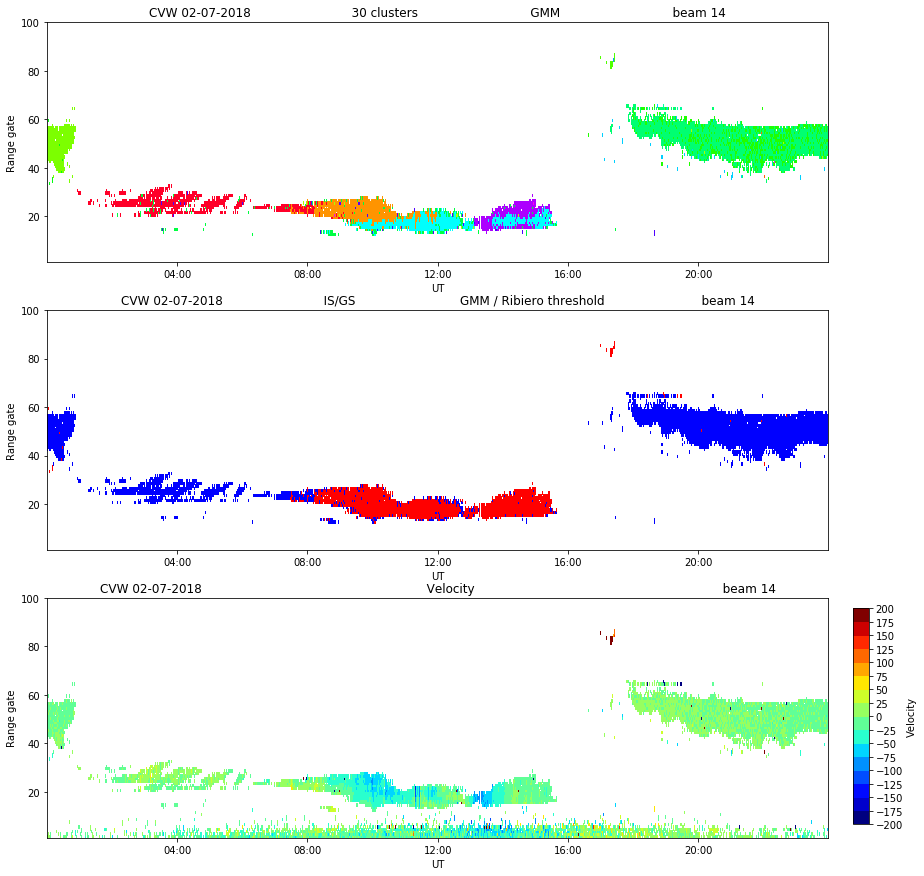

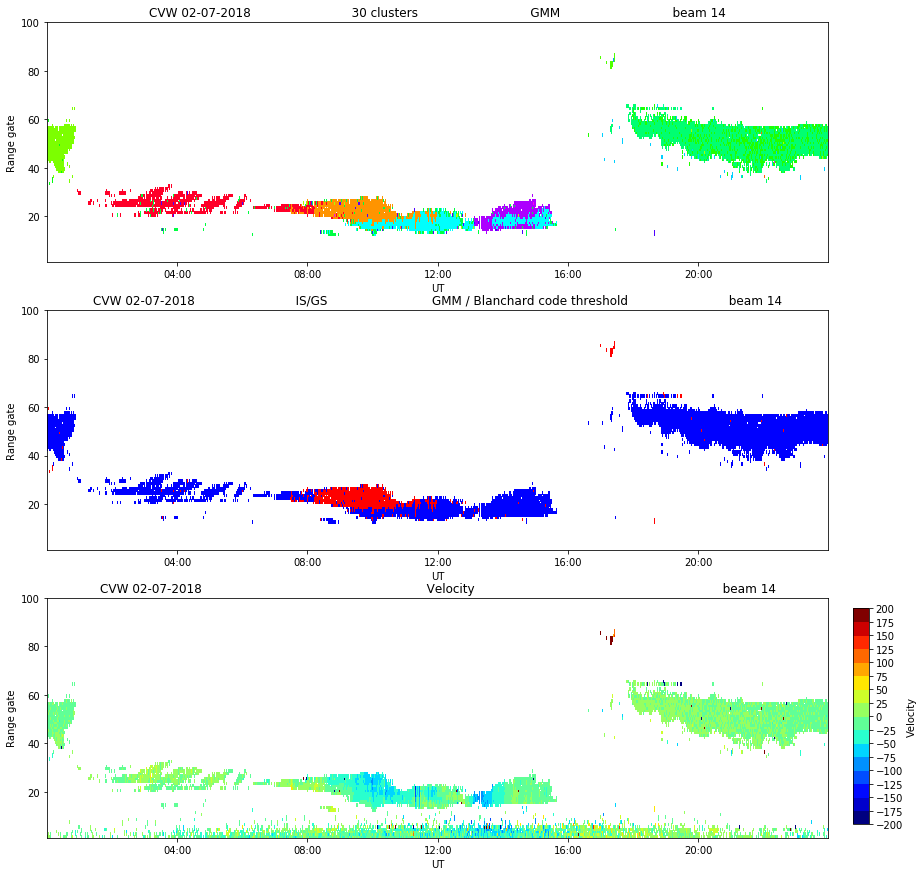

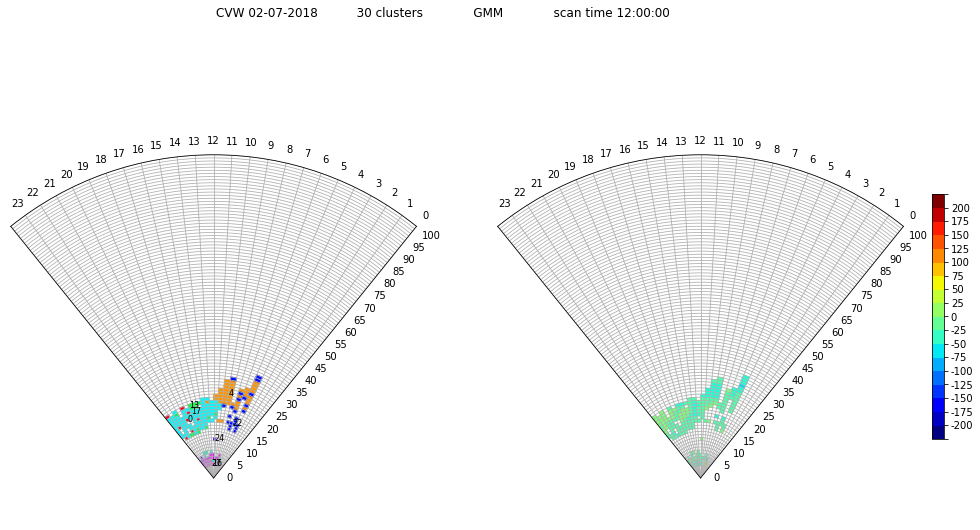

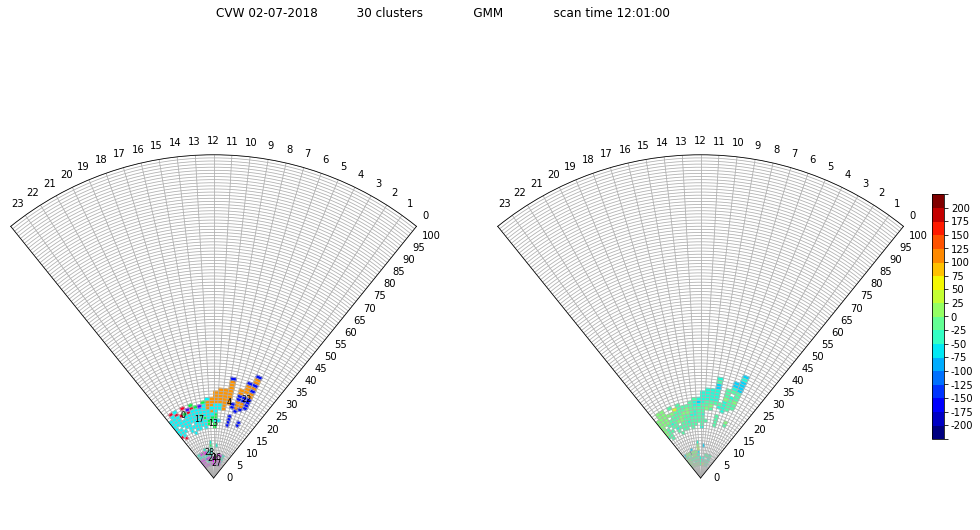

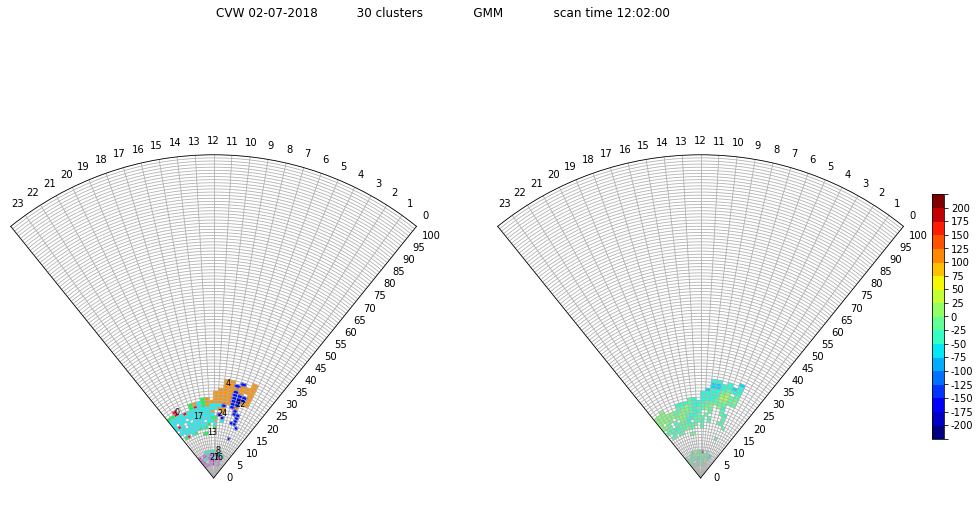

In [2]:
%matplotlib inline
# Make RTI plots to compare AJ's threshold with traditional threshold
gmm.plot_rti(14, 'Ribiero', save=True)           # Each of these take ~1 minute
gmm.plot_rti(14, 'Blanchard code', save=True)
# Make fanplots of the individual clusters over some time period
fanplot_start =  datetime.datetime(2018, 2, 7, 12, 0, 0)
fanplot_end =  datetime.datetime(2018, 2, 7, 12, 2, 0)
gmm.plot_fanplots(fanplot_start, fanplot_end, save=True)

In [4]:
from algorithms.DBSCAN_GMM import DBSCAN_GMM
dbgmm = DBSCAN_GMM(start_time, end_time, 'cvw', useSavedResult=True, BoxCox=False)
#dbgmm.save_result()
print(dbgmm.runtime)

43.54023575782776


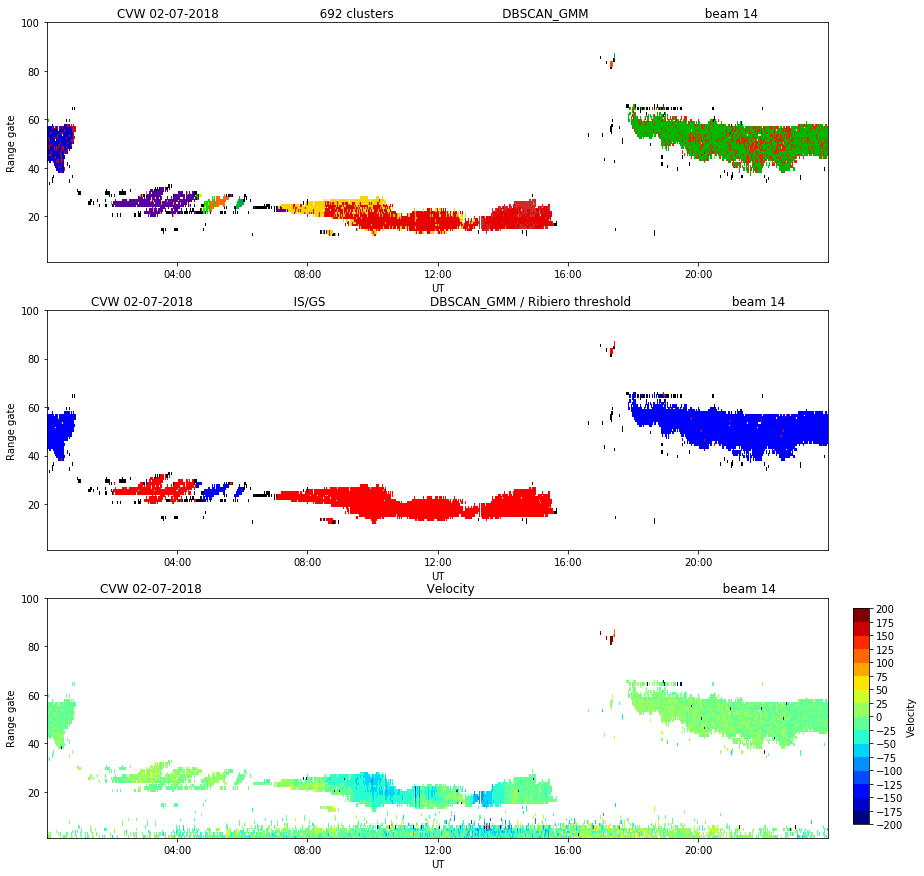

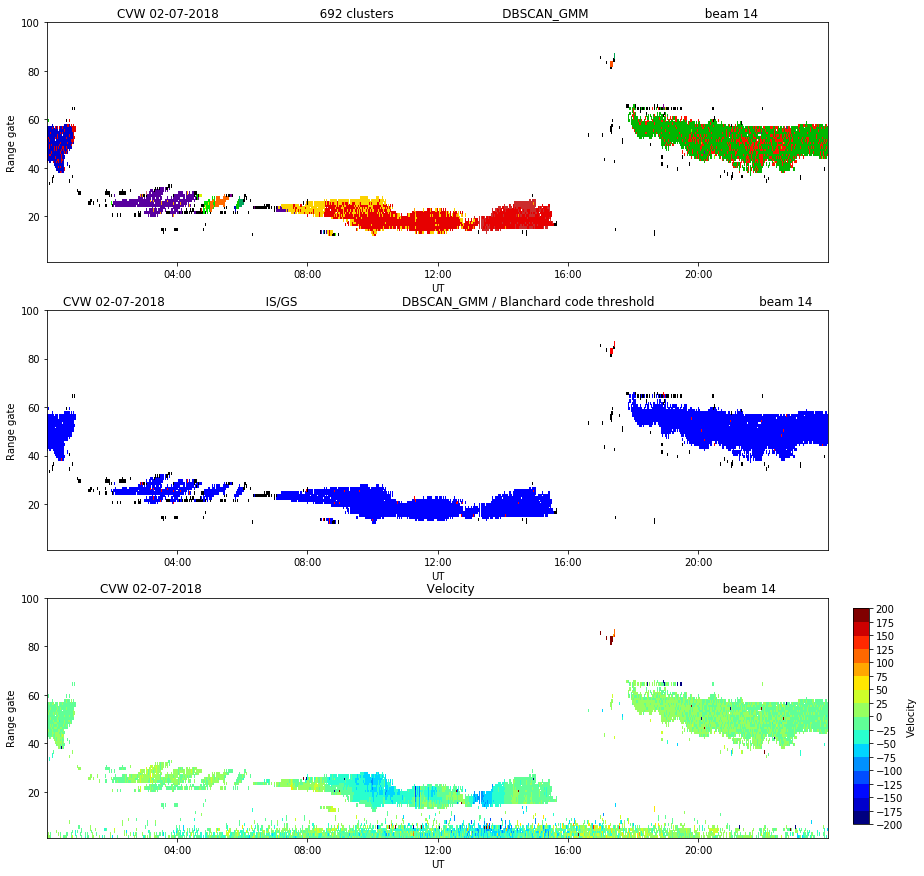

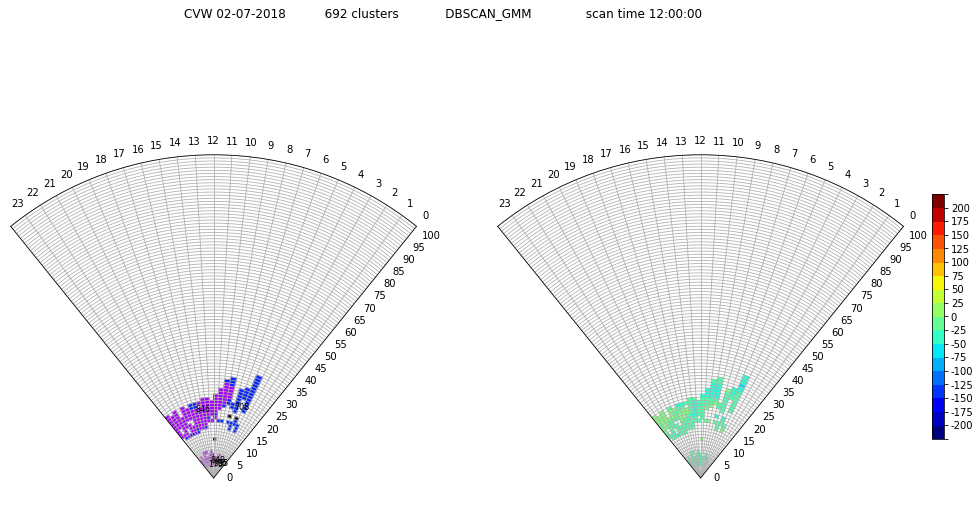

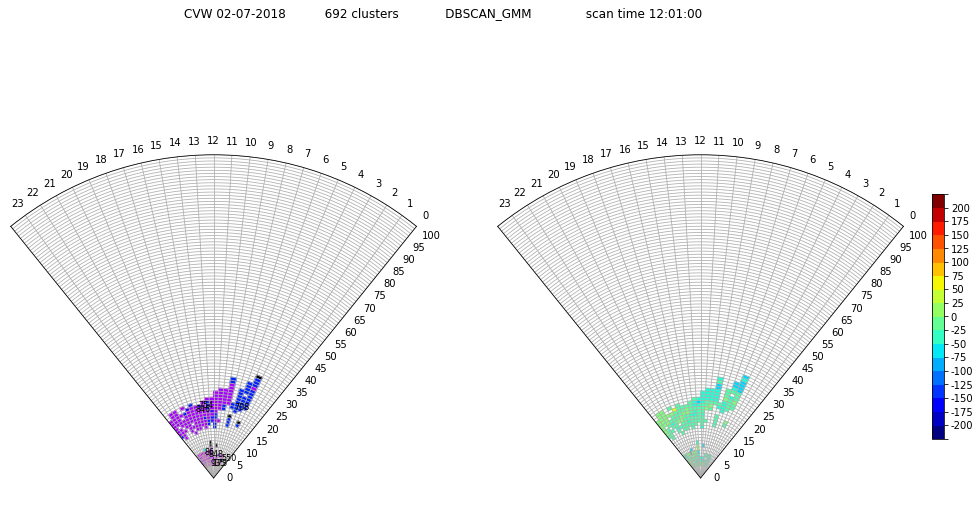

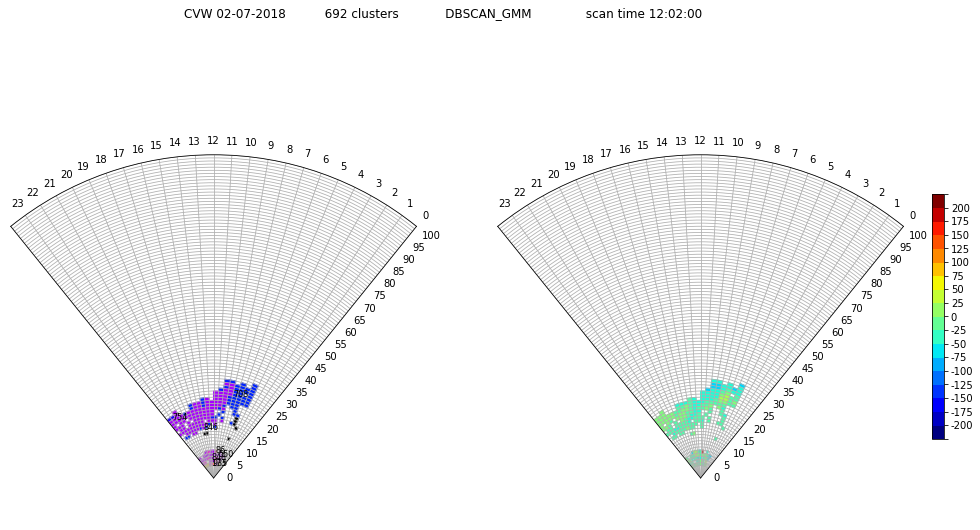

In [5]:
%matplotlib inline
# Make RTI plots to compare AJ's threshold with traditional threshold
dbgmm.plot_rti(14, 'Ribiero', save=True)           # Each of these take ~1 minute
dbgmm.plot_rti(14, 'Blanchard code', save=True)
# Make fanplots of the individual clusters over some time period
fanplot_start =  datetime.datetime(2018, 2, 7, 12, 0, 0)
fanplot_end =  datetime.datetime(2018, 2, 7, 12, 2, 0)
dbgmm.plot_fanplots(fanplot_start, fanplot_end, save=True)